-----
<center>
<h1 style="font-size: 50px; font-family: MS-GOTHIC UI;">ANALYSIS OF FUEL CONSUMED PER K/M!</h1>
</center>

---

<center>
<img src="https://media1.tenor.com/m/NXgBxaISzYYAAAAC/latenightwithsethmeyers-nbc.gif" width="550" height='100'>
</center>


---
<center>
<h2 style="font-size: 50px; font-family: MS-GOTHIC UI;">The Information used in this Analysis</h2>
</center>

---

1. **Dataset**: The given dataset contains 2022 Fuel Consumption Ratings information.

2. **Model Year**: Represents the year in which a particular vehicle model was produced.

3. **Make**: Describes the brand or manufacturer of a vehicle.

4. **Model**: Refers to a specific version of a vehicle produced by a manufacturer under a particular make or brand.

5. **Vehicle Class**: Represents the categorization system used in the automotive industry to group vehicles based on their size, body style, and intended use.

6. **Engine Size**: Refers to the total volume of air and fuel that can be drawn into the engine cylinders of a vehicle during one complete cycle. It is typically measured in either cubic centimeters (cc) or liters (L).

7. **Cylinders**: Refers to the individual chambers within a vehicle's engine where the combustion process occurs.

8. **Transmission**: Represents the system that transmits power from the engine to the wheels, allowing the vehicle to move forward or backward.

9. **Fuel Type**: Refers to the specific type of fuel used to power a vehicle or machine. Z = Premium gasoline | D = Diesel | E = Ethanol | X = Regular gasoline

10. **Fuel Consumption (City (L/100 km))**: Represents fuel consumption in the city.

11. **Fuel Consumption (Hwy (L/100 km))**: Represents fuel consumption on the highway.

12. **Fuel Consumption (Comb (L/100 km))**: Represents fuel consumption for both city and highway combined.

13. **Fuel Consumption (Comb (mpg))**: Represents fuel consumption for both city and highway, measured in miles per imperial gallon (mpg).

14. **CO2 Emissions (g/km)**: Refers to the amount of CO2 emitted by a vehicle per kilometer driven.

15. **CO2 Rating**: Measures a vehicle's carbon dioxide (CO2) emissions, typically expressed in grams of CO2 per kilometer (g/km).

16. **Smog Rating**: Measures a vehicle's emissions of pollutants that contribute to smog formation.



------------------------------
<center id="report">
<h1 style="font-size: 45px; font-family: MS-GOTHIC UI;">INDEX MODULE</h1>
</center>

---


1. <a href="#Importmodules" style="color:red;">Import Modules</a><br>
    1.1 <a href="#Importdata" style="color:red;">Importing data into Dataframe</a><br>
    
2. <a href="#Datatcleaning" style="color:red;">Data cleaning</a><br>
    2.1 <a href="#df1" style="color:red;">Creating new DataFrame with necessary columns</a><br>
    2.2 <a href="#nullcheck" style="color:red;">Checking null values</a><br>
    2.3 <a href="#treatfuel" style="color:red;">Treating Null's in "Fuel type"</a><br>
    2.4 <a href="#nullco2" style="color:red;">Dealing with the nulls present in feature "CO2 Rating"</a><br>
    
<a href="#eda" style="color:red;">Exploratory Data Analysis (E.D.A.)</a><br>

3. <a href="#univar" style="color:red;">Univariate analysis:-</a><br>
    3.1  <a href="#mean" style="color:red;">Checking Mean, Median, Standard Deviation and Quantile</a><br>
    3.2 <a href="#distribute" style="color:red;">Frequency Distribution for the categorical Columns</a><br>
    3.3 <a href="#numerical" style="color:red;">Frequency Distribution on Numerical columns</a><br>
    
4. <a href="#bivariate" style="color:red;">Bivariate analysis:-</a><br>
    4.1 <a href="#compare" style="color:red;">Comparison Between all columns</a><br>
    4.2  <a href="#comparecylinder" style="color:red;">Comparison between "No. of cylinders" & "Fuel consumption"</a><br>
    4.3 <a href="#chi" style="color:red;">Performing Chi Square analysis</a><br>
    4.4 <a href="#heatcorr" style="color:red;">Heatmap showing "Pearson correlation"</a><br>
    

5. <a href="#prepro" style="color:red;">Data Preprocessing</a><br>
    5.1 <a href="#outlier" style="color:red;">Outlier analysis</a><br>
    5.2 <a href="#ordinal" style="color:red;">Ordinal encoding</a><br>
    5.3 <a href="#onehot" style="color:red;">One Hot encoding on categorical columns</a><br>
    5.4 <a href="#traintest" style="color:red;">Split into train and test set</a><br>
    5.5 <a href="#scailing" style="color:red;">Feature Scaling</a><br>
    

6. <a href="#model" style="color:red;">Training Models</a><br>
    6.1 <a href="#linear" style="color:red;">Linear Regression</a><br>
    6.2  <a href="#decision" style="color:red;">Decision Tree Regressor</a><br>
    6.3 <a href="#rf" style="color:red;">Random Forest Regressor</a><br>
    
    
    
7. <a href="#deployment" style="color:red;">Model Deployment</a><br>
    7.1 <a href="#pickling" style="color:red;">Pickling Model and Scaler object for Deployment</a><br>


---
# 1. IMPORT MODULES
<span id="#Importmodules"></span>

---

## Using Pandas Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Using Machine Learning Modules

In [ ]:
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# 1.1 Creating Dataframe & Basic Observation
<span id="Importdata"></span>

In [1]:
data = pd.read_csv(r"D:\College Stuff\Sem 3\Main Credit Subjects\Fundamentals of Data Science\Project Report\Analysis of Fuel(jupyter)\data\vehicles_data_2022.csv")
data

NameError: name 'pd' is not defined

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year of Manufacture                  945 non-null    int64  
 1   Brand Name                           945 non-null    object 
 2   Model                                945 non-null    object 
 3   Vehicle Category                     945 non-null    object 
 4   Engine Capacity (Liters)             945 non-null    float64
 5   Number of Cylinders                  945 non-null    int64  
 6   Transmission                         945 non-null    object 
 7   TYPE OF FUEL                         944 non-null    object 
 8   City Fuel Efficiency (L/100 km)      935 non-null    float64
 9   Highway Fuel Efficiency (L/100 km)   934 non-null    float64
 10  Combined Fuel Efficiency (L/100 km)  945 non-null    float64
 11  Combined Fuel Efficiency (mpg)  

In [5]:
data.columns

Index(['Year of Manufacture', 'Brand Name', 'Model', 'Vehicle Category',
       'Engine Capacity (Liters)', 'Number of Cylinders', 'Transmission',
       'TYPE OF FUEL', 'City Fuel Efficiency (L/100 km)',
       'Highway Fuel Efficiency (L/100 km)',
       'Combined Fuel Efficiency (L/100 km)', 'Combined Fuel Efficiency (mpg)',
       'CO2 Emission Rate (g/km)', 'Carbon Dioxide Rating',
       'Smog Emission Rating'],
      dtype='object')

In [6]:
data[['Carbon Dioxide Rating','Smog Emission Rating','CO2 Emission Rate (g/km)']].corr()

,Carbon Dioxide Rating,Smog Emission Rating,CO2 Emission Rate (g/km)
Carbon Dioxide Rating,1.000000,0.702559,-0.752363
Smog Emission Rating,0.702559,1.000000,-0.550416
CO2 Emission Rate (g/km),-0.752363,-0.550416,1.000000


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">2. Data cleaning</h1>
</center>
<span id="Datatcleaning"></span>

---

# 2.1 Creating new DataFrame with necessary columns
<span id="df1"></span>


In [7]:
df= data.drop(['Year of Manufacture','Brand Name','Model','City Fuel Efficiency (L/100 km)','Highway Fuel Efficiency (L/100 km)','Combined Fuel Efficiency (mpg)','CO2 Emission Rate (g/km)','Smog Emission Rating'],axis=1)

**New DataFrame**

In [11]:
df

,Vehicle Category,Engine Capacity (Liters),Number of Cylinders,Transmission,TYPE OF FUEL,Combined Fuel Efficiency (L/100 km),Carbon Dioxide Rating
0,Hatchback,1.2,4,Manual,X,5.2,7.0
1,SUV,1.5,4,Automatic,X,6.6,6.0
2,Compact SUV,1.5,4,Manual,D,5.5,6.0
3,SUV,2.0,4,Manual,X,8.9,5.0
4,SUV,1.5,4,Automatic,X,6.4,6.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS8,Z,9.4,5.0
941,SUV: Small,2.0,4,AS8,Z,9.4,5.0
942,SUV: Small,2.0,4,AS8,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS8,Z,10.1,5.0


**Renaming the columns**

In [8]:
df = df.rename(columns = {'Vehicle Category':'Vehicle Class', 'Engine Capacity (Liters)':'Engine Size', 'Number of Cylinders': 'Cylinders', 'Transmission':'Transmission','TYPE OF FUEL':'Fuel Type', 'Combined Fuel Efficiency (L/100 km)':'Fuel Consumption', 'Carbon Dioxide Rating':'CO2 Rating'})

## 2.2 CHECKING ALL NULL VALUES
<span id="nullcheck"></span>

In [9]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           1
Fuel Consumption    0
CO2 Rating          8
dtype: int64

## 2.3.1  TYPE OF FUEL
<span id="treatfuel"></span>

In [10]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [11]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Hatchback,1.2,4,Manual,X,5.2,7.0
1,SUV,1.5,4,Automatic,X,6.6,6.0
2,Compact SUV,1.5,4,Manual,D,5.5,6.0
3,SUV,2.0,4,Manual,X,8.9,5.0
4,SUV,1.5,4,Automatic,X,6.4,6.0


## 2.3.2 CARBON DIOXIDE RATING
<span id="nullco2"></span>

In [12]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.000000,-0.144171
CO2 Rating,-0.144171,1.000000


In [13]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
0.0,32.50
1.0,21.35
2.0,16.20
3.0,13.95
4.0,11.70
5.0,10.10
6.0,8.70
7.0,7.60
8.0,6.40


In [41]:
df['CO2 Rating'].fillna(0,inplace=True)
new_rating = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_rating.append(1)
        elif 16.0 <= fuel < 20.0:
            new_rating.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_rating.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_rating.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_rating.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_rating.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_rating.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_rating.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_rating.append(9)
        elif fuel < 5.0: 
            new_rating.append(10)            
    else:
        new_rating.append(co2)
        
        
df['CO2 Rating'] = new_rating

In [42]:
df.isna().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

## CHECKING THE CORRELATION

In [19]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
overall_fuel_corr = correlation_matrix["Fuel Consumption"].to_frame()
print(overall_fuel_corr)

                  Fuel Consumption
Engine Size              -0.296997
Cylinders                -0.326721
Fuel Consumption          1.000000
CO2 Rating               -0.139553


**Checking Corelation of each feature against target variable**

In [20]:
print(df['Fuel Consumption'].unique())

[ 5.2   6.6   5.5   8.9   6.4   5.6   3.    2.    1.7   3.4   6.3   9.2
  6.7   3.3   2.1   2.7   7.5   6.    8.    5.7   5.3   6.5   4.7   6.2
  7.1   7.6   8.2  11.   10.   20.    3.1   3.2   2.9   2.6   1.9   2.3
  2.4   0.85  1.3   0.   19.   17.5  18.8  18.   18.5  17.   14.   15.
 12.   15.5  37.   36.   28.5  35.5  34.   60.   57.   47.5  52.5  53.
 54.   59.   29.   31.   30.5  62.5  33.   67.5  87.5  19.5  16.5  16.
 18.2  21.   23.   22.   37.5  40.   33.5  36.5  43.5  14.5   9.   13.
 57.5  56.5  51.5  27.5  32.5  26.5  41.   25.   11.5  13.9  15.1  15.3
 10.3  12.3  15.6  11.3  14.1   9.1  11.7  11.8  12.4  13.7  14.3  13.1
 13.2  13.4  13.5  10.2   9.3  10.1  11.2   7.8   8.4   5.8   5.9  12.9
 10.7   9.6  10.9  11.1  12.8  17.9  17.4  15.4  12.1  18.1  17.8  14.6
 15.2  15.8  13.3   9.7  16.7  10.5  12.7  10.4   9.4  10.6   9.5  12.6
 11.6   9.9  11.4  19.1  14.8  16.2  21.5  13.6  14.4  14.7  16.4   8.6
  7.2   5.    6.9   7.7   8.1   8.5   4.4   4.2   4.    7.4   7.9   

In [21]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
if 'Fuel Consumption' in correlation_matrix.columns:
    fuel_consumption_corr = correlation_matrix['Fuel Consumption'].to_frame()
    print(fuel_consumption_corr)
else:
    print("'Fuel Consumption' column not found in numeric columns")


                  Fuel Consumption
Engine Size              -0.296997
Cylinders                -0.326721
Fuel Consumption          1.000000
CO2 Rating               -0.139553


## LOOKING FOR NOISE IN ALL THE FEATURES, INCLUDING THE TARGET VARIABLE.

In [22]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle Class
['Hatchback' 'SUV' 'Compact SUV' 'Sedan' 'Bike' 'Scooter' 'MPV'
 'Crossover' 'Sports Car' 'Electric Scooter' 'Electric Vehicle'
 'Electric SUV' 'Motorcycle' 'Pickup' 'Truck' 'Mini Truck' 'Auto Rickshaw'
 'Electric Auto' 'Mid-size' 'Full-size' 'SUV: Standard' 'SUV: Small'
 'Pickup truck: Standard' 'Two-seater' 'Pickup truck: Small' 'Subcompact'
 'Special purpose vehicle' 'Compact' 'Station wagon: Small' 'Minivan'
 'Minicompact' 'Station wagon: Mid-size'] 

Engine Size
[1.2   1.5   2.    0.35  0.11  0.1   0.15  1.    2.2   0.12  0.22  2.5
 4.    3.9   8.    0.155 0.248 0.225 0.199 0.125 0.113 0.087 0.124 0.115
 0.44  0.64  0.3   2.7   0.373 0.197 0.348 0.249 0.16  0.648 0.645 0.312
 0.19  0.295 0.162 0.411 0.471 0.097 0.099 0.8   1.1   0.349 2.8   3.
 0.6   0.7   1.7   3.5   0.    1.4   0.5   3.8   5.    6.    6.4   6.2
 3.6   5.7   1.3   2.3   3.3   5.2   5.3   1.8   1.6   5.6   2.4   3.2
 6.5   4.6   3.4   3.7   2.9   6.7  ] 

Cylinders
[ 4  1  3  8 16  2  6  0 12 10] 

T

## REMOVING THE NUMBERS FROM TRANSMISSION COLUMN

In [23]:
df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M',\
                                   'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Hatchback,1.2,4,Manual,X,5.2,7.0
1,SUV,1.5,4,Automatic,X,6.6,6.0
2,Compact SUV,1.5,4,Manual,D,5.5,6.0
3,SUV,2.0,4,Manual,X,8.9,5.0
4,SUV,1.5,4,Automatic,X,6.4,6.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS,Z,9.4,5.0
941,SUV: Small,2.0,4,AS,Z,9.4,5.0
942,SUV: Small,2.0,4,AS,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS,Z,10.1,5.0


In [24]:
df['Transmission'].unique()

array(['Manual', 'Automatic', 'CVT', 'M', 'A', 'AS', 'AV', 'AM'],
      dtype=object)

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">Exploratory Data Analysis (E.D.A.)</h1>
</center>
<span id="eda"></span>

---


# 3. Univariate analysis:-
<span id="univar"></span>

---

## 3.1 Statistical Summary :
<span id="mean"></span>


In [25]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,945.000000,945.000000,945.000000,945.000000
mean,2.512506,4.648677,14.066455,5.179894
std,1.511435,2.130628,10.857595,1.697898
min,0.000000,0.000000,0.000000,1.000000
25%,1.500000,4.000000,8.900000,4.000000
50%,2.300000,4.000000,11.200000,5.000000
75%,3.400000,6.000000,14.700000,6.000000
max,8.000000,16.000000,87.500000,10.000000


## 3.2 GENERATE THE FREQUENCY COUNT FOR THE CATEGORICAL COLUMNS
<span id="distribute"></span>


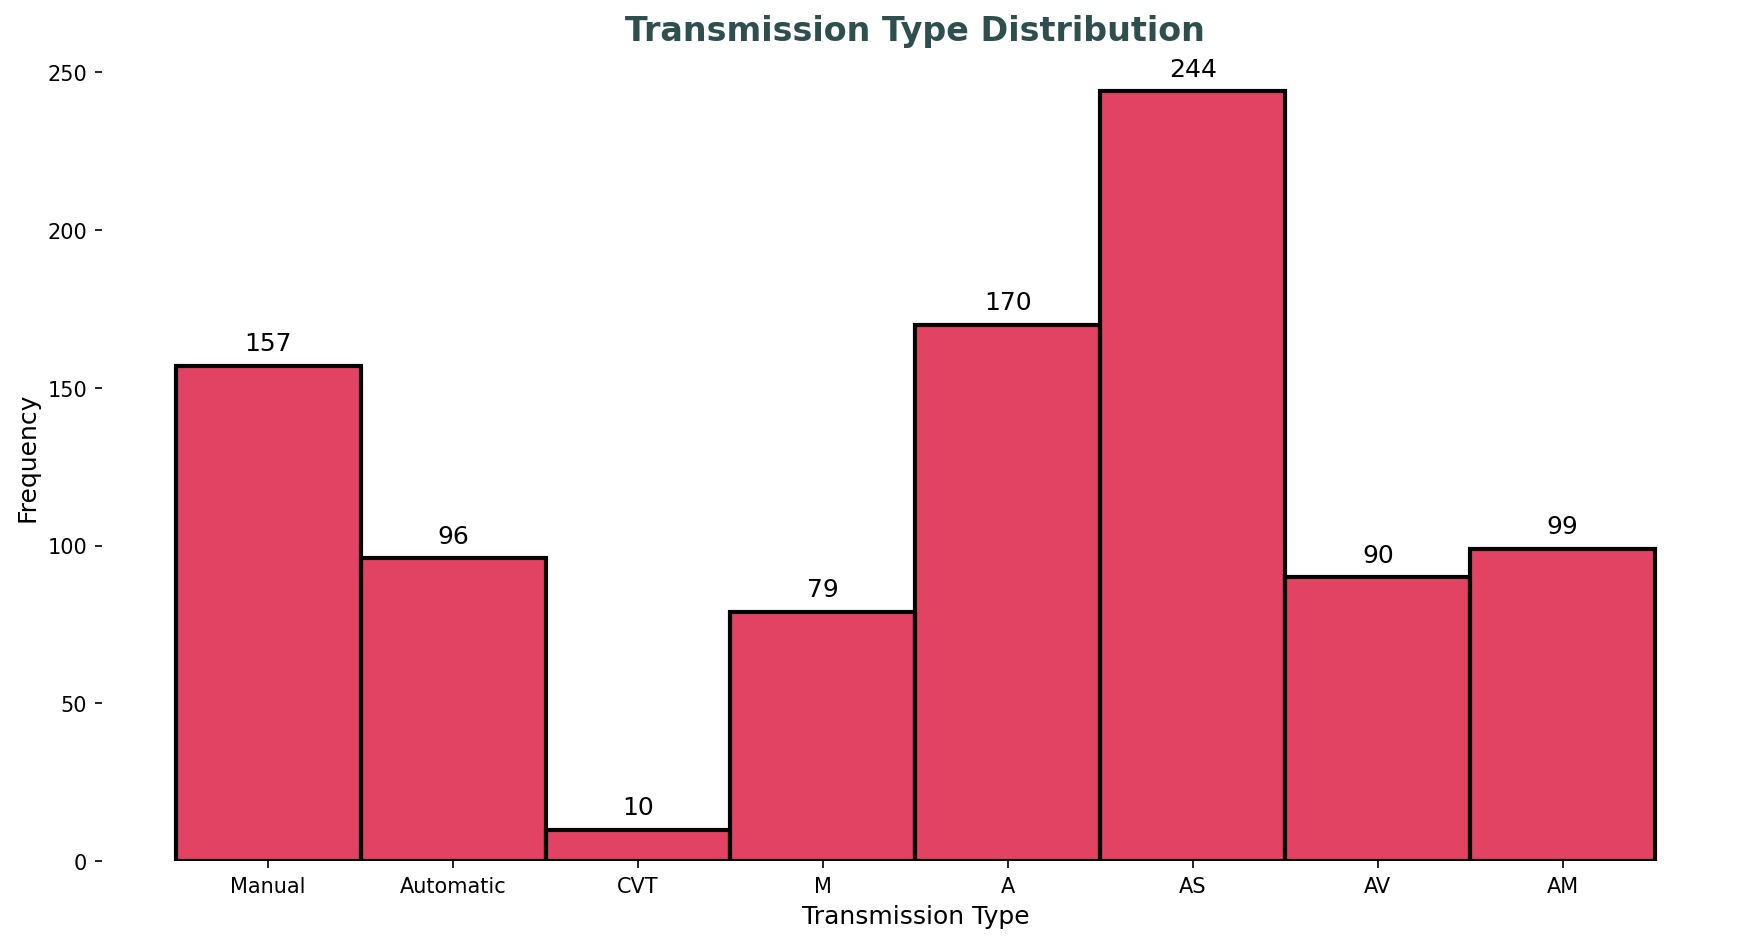

In [26]:
plt.figure(figsize=(14,7), dpi=150)
chart1 = sns.histplot(data=df, x='Transmission', color='Crimson', edgecolor='black', linewidth=2, alpha=0.8)
chart1.bar_label(chart1.containers[0], size=12, label_type='edge', color='Black', padding=5)
chart1.set_title('Transmission Type Distribution', fontsize=16, fontweight='bold', color='DarkSlateGray')
chart1.set_xlabel('Transmission Type', fontsize=12)
chart1.set_ylabel('Frequency', fontsize=12)
sns.despine(left=True, bottom=True)
plt.show()

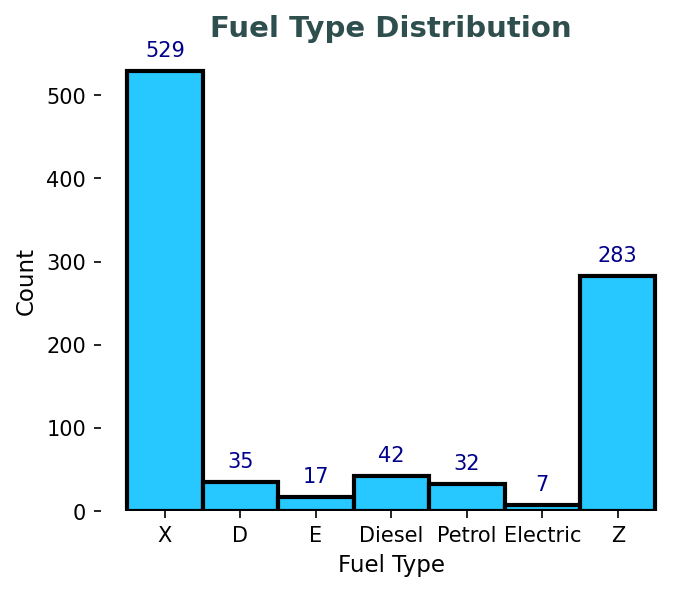

In [27]:
plt.figure(figsize=(5,4), dpi=150)
chart1 = sns.histplot(data=df, x='Fuel Type', color='DeepSkyBlue', edgecolor='black', linewidth=2, alpha=0.85)
chart1.bar_label(chart1.containers[0], size=10, label_type='edge', color='DarkBlue', padding=5)
chart1.set_title('Fuel Type Distribution', fontsize=14, fontweight='bold', color='DarkSlateGray')
chart1.set_xlabel('Fuel Type', fontsize=11)
chart1.set_ylabel('Count', fontsize=11)
sns.despine(left=True, bottom=True)
plt.show()

## 3.3 DISTRIBUTION OF NUMERICAL COLUMNS
<span id="numerical"></span>


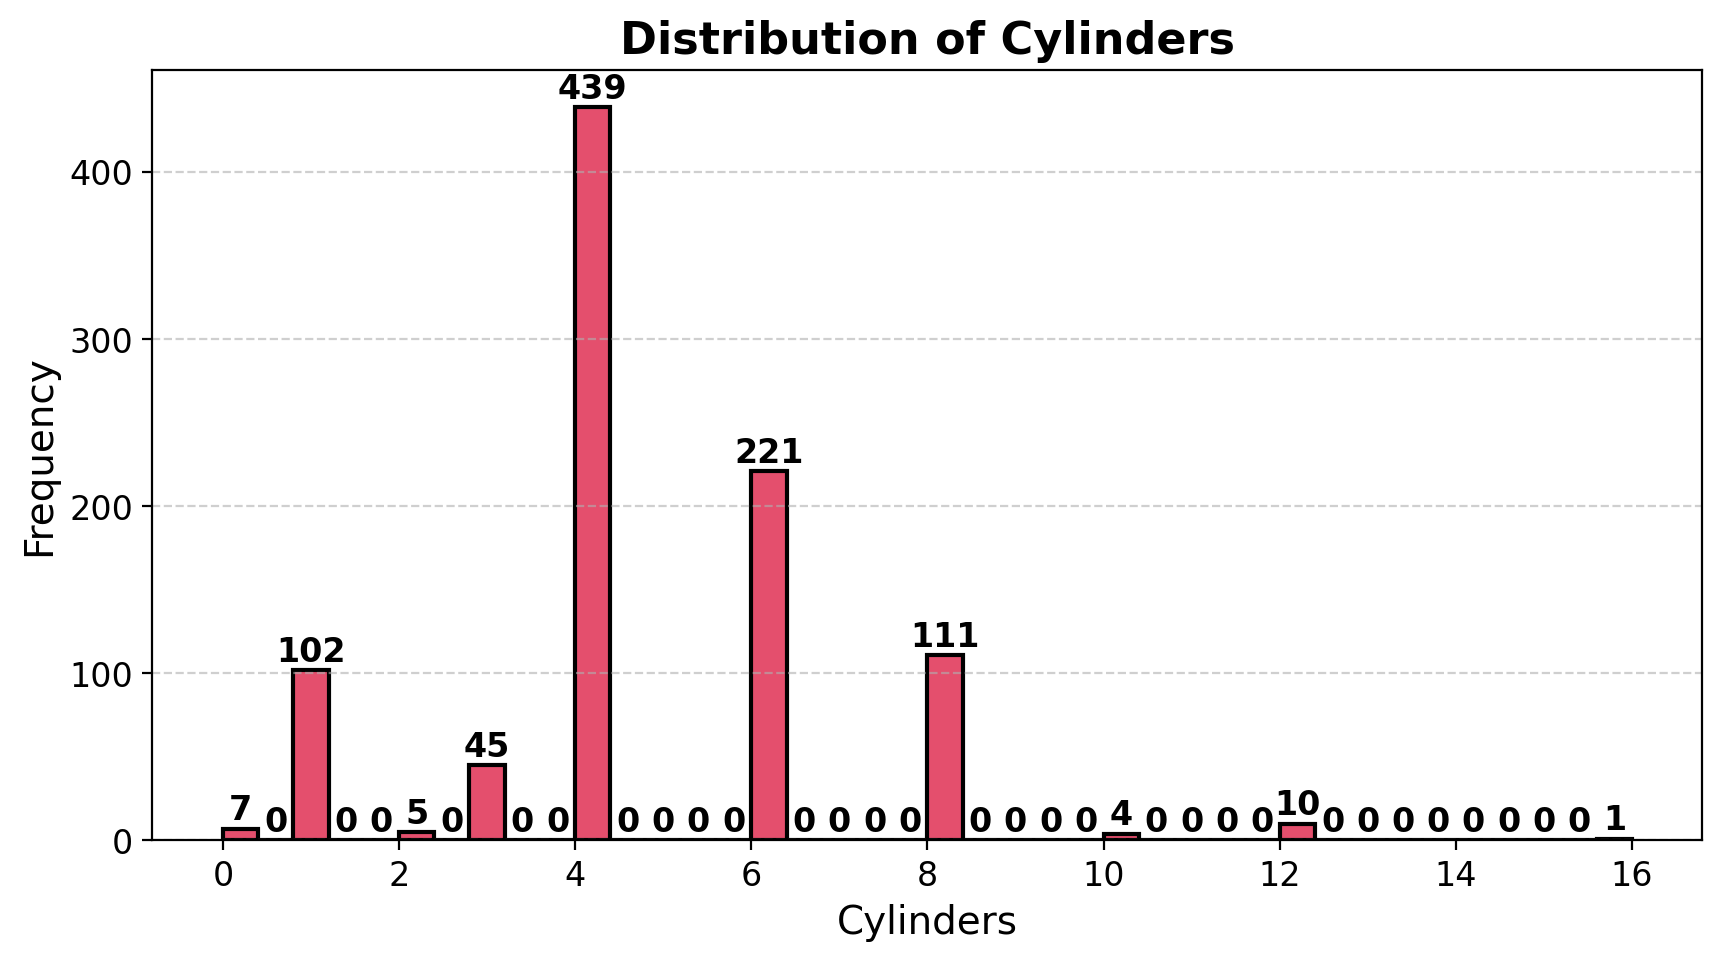

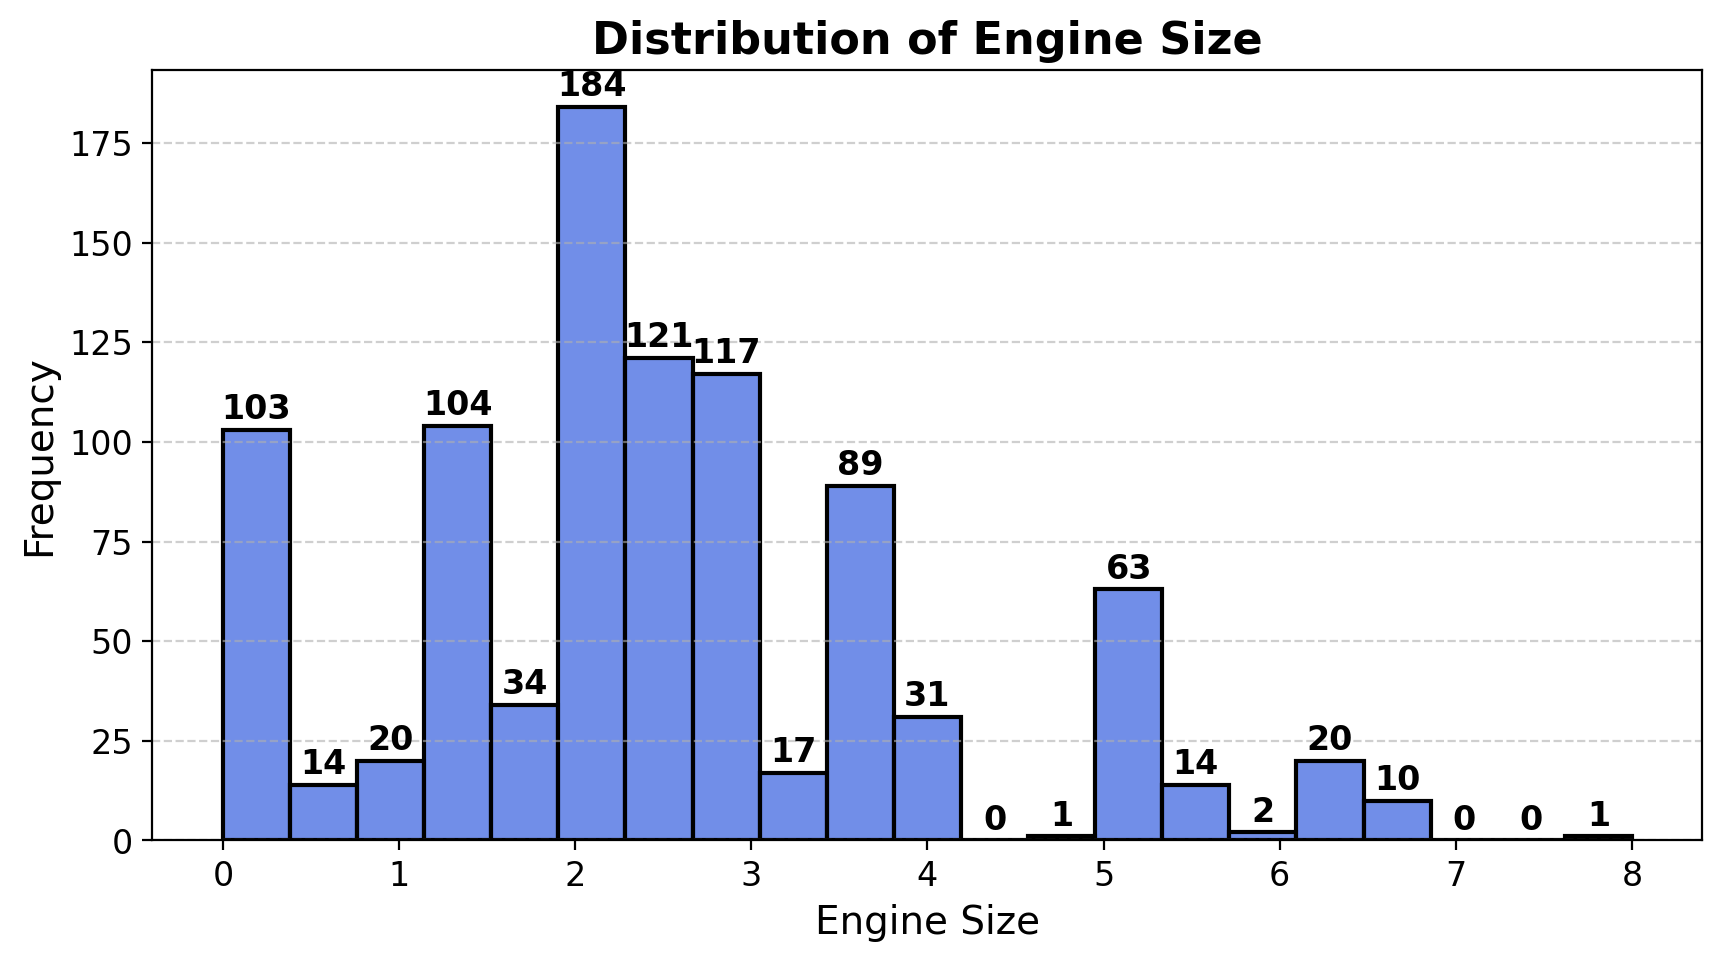

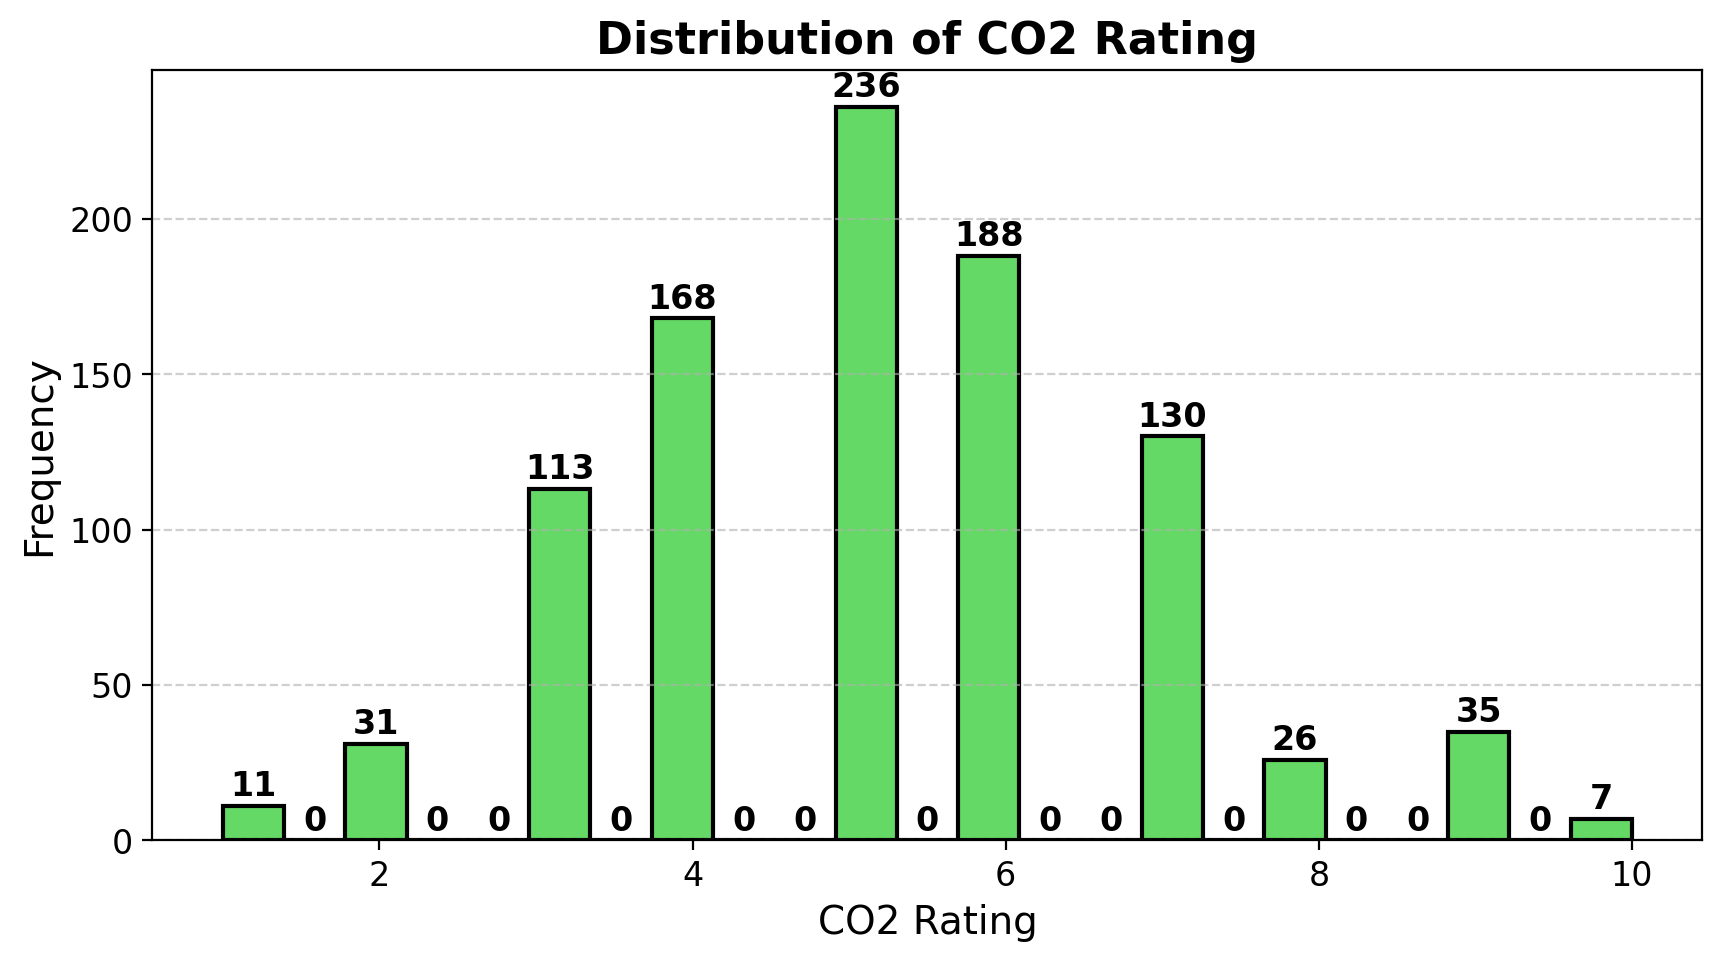

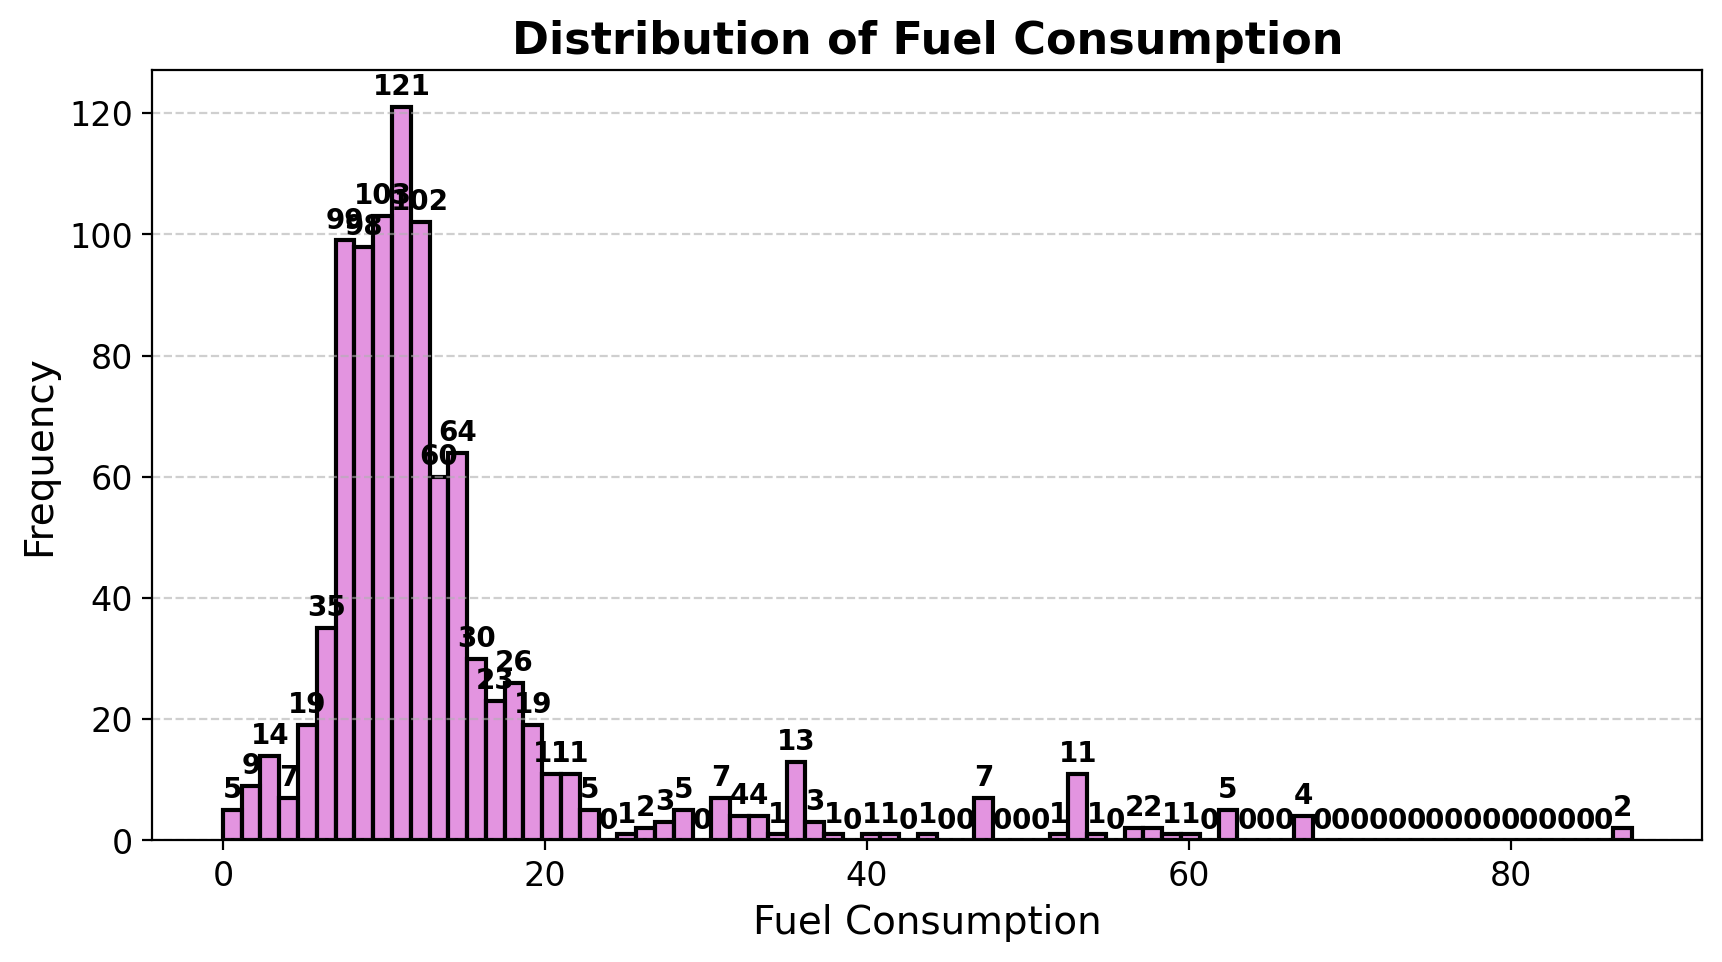

In [28]:
column_set = ['Cylinders', 'Engine Size', 'CO2 Rating', 'Fuel Consumption']
color_set = ['Crimson', 'RoyalBlue', 'LimeGreen', 'Orchid']

for colors, col in zip(color_set, column_set):
    plt.figure(figsize=(10, 5), dpi=200)
    chart1 = sns.histplot(data=df, x=col, color=colors, edgecolor='black', linewidth=1.5)
    
    for bar in chart1.patches:
        height = bar.get_height()
        if col == 'Fuel Consumption':
            chart1.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10,  
                weight='bold'
            )
        else:
            chart1.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,  
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=12,  
                weight='bold'
            )
    
    chart1.set_title(f"Distribution of {col}", fontsize=16, weight='bold')
    chart1.set_xlabel(col, fontsize=14)
    chart1.set_ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.6)
    plt.show()

---
# 4: BIVARIATE ANALYSIS
<span id="bivariate"></span>

---

## 4.1 COMPARING BETWEEN ALL GIVEN COLUMNS FROM THE DATASET
<span id="compare"></span>


<Figure size 1950x900 with 0 Axes>

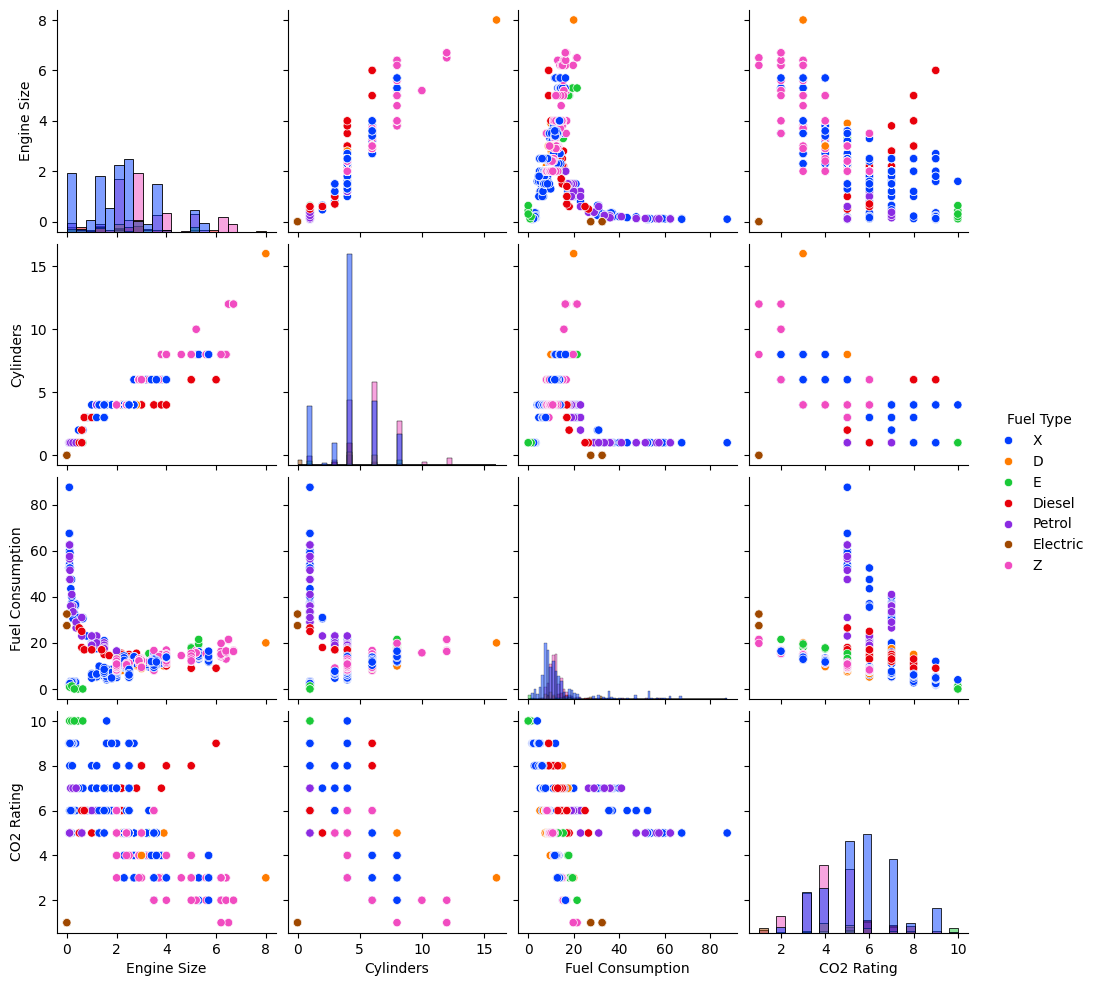

In [30]:
plt.figure(figsize=(13, 6), dpi=150)
sns.set_palette("Paired")
sns.pairplot(df, hue='Fuel Type', diag_kind='hist', palette='bright', markers='o')
plt.show()

## 4.2 COMPARISON OF "NUMBER OF CYLINDERS" AND "FUEL CONSUMPTION"
<span id="comparecylinder"></span>


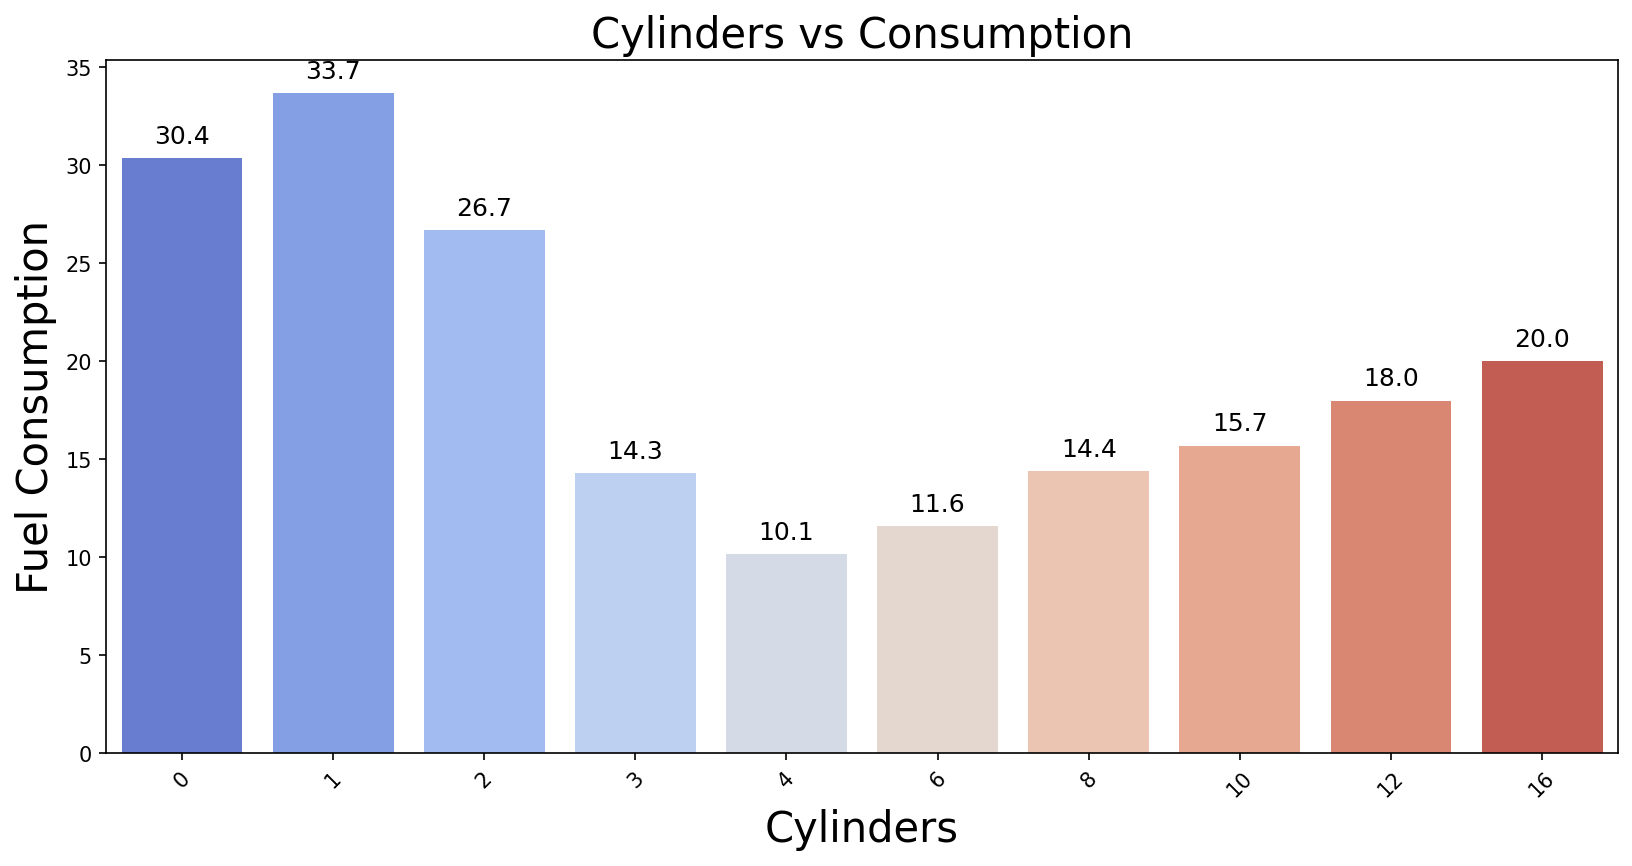

In [31]:
plt.figure(figsize=(13, 6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption', size=20)

chart1 = sns.barplot(data=df, x="Cylinders", y="Fuel Consumption", palette='coolwarm', ci=None)
plt.xlabel('Cylinders', size=20)
plt.ylabel('Fuel Consumption', size=20)

for bar in chart1.patches:
    height = bar.get_height()
    chart1.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.show()

## 4.4 HEATMAP DISPLAYING "PEARSON CORRELATION"
<span id="heatcorr"></span>


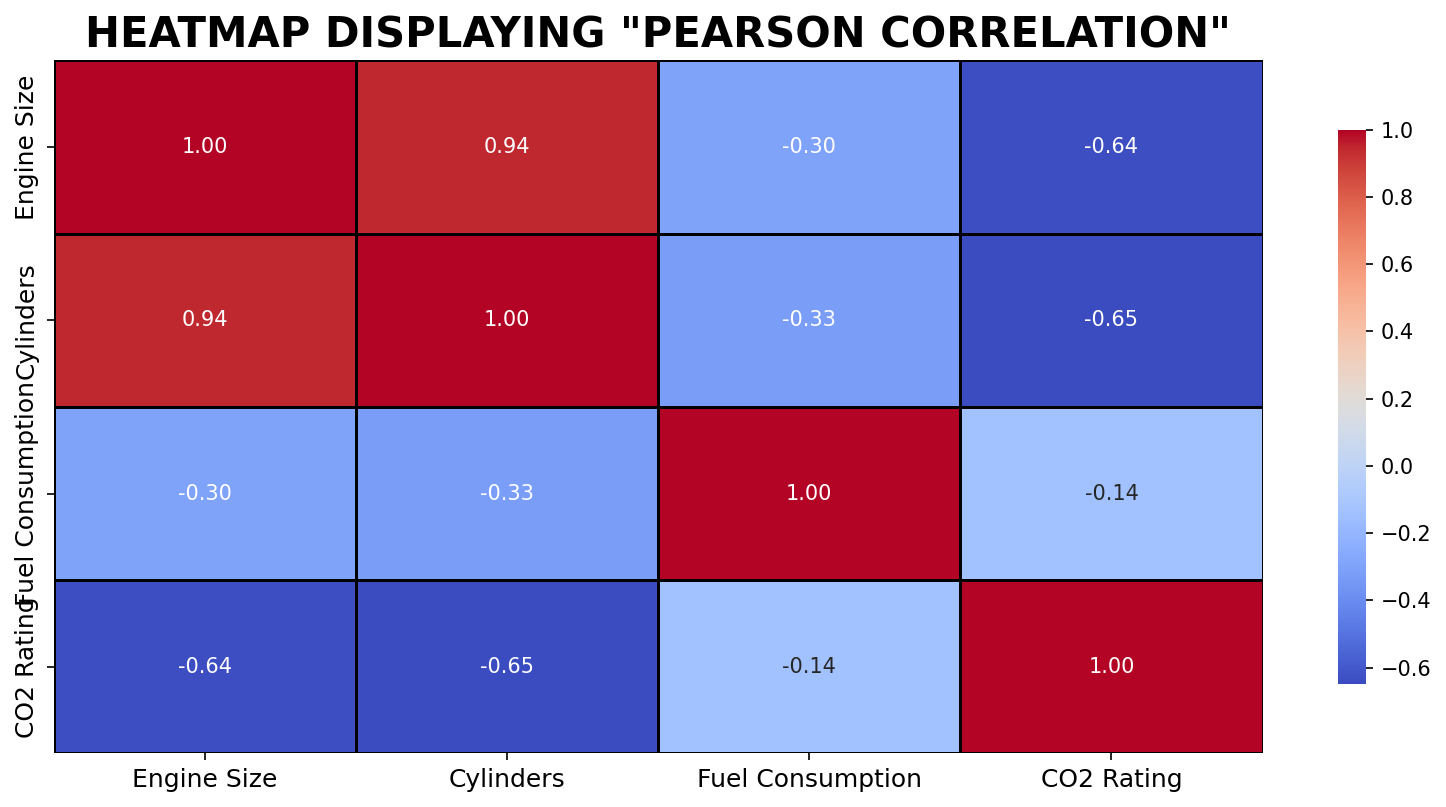

In [51]:
plt.figure(figsize=(13, 6), dpi=150)
plt.title('HEATMAP DISPLAYING "PEARSON CORRELATION"', fontsize=20, weight='bold')
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='black', cbar=True, cbar_kws={"shrink": .8})
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# 5 PERFORMING CHI-SQUARE ANALYSIS
<span id="chi"></span>


## 5.1 TRANSMISSION AND FUEL TYPE

In [32]:
# from scipy.stats import chi2_contingency
fuel_type= pd.crosstab(df['Transmission'],df['Fuel Type'])

In [33]:
fuel_type

Fuel Type,D,Diesel,E,Electric,Petrol,X,Z
Transmission,,,,,,,
A,16,0,3,0,0,91,60
AM,0,0,0,0,0,22,77
AS,0,0,8,0,0,139,97
AV,0,0,0,0,0,81,9
Automatic,14,8,4,7,14,49,0
CVT,0,0,2,0,0,8,0
M,0,0,0,0,0,39,40
Manual,5,34,0,0,18,100,0


In [34]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [35]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.176373925859099e-103
Dependent
dof is 42


## 5.2 TRANSMISSION AND VEHICLE CATEGORY

In [36]:
Class=pd.crosstab(df['Transmission'],df['Vehicle Class'])

In [37]:
Class

Vehicle Class,Auto Rickshaw,Bike,Compact,Compact SUV,Crossover,Electric Auto,Electric SUV,Electric Scooter,Electric Vehicle,Full-size,...,SUV: Standard,Scooter,Sedan,Special purpose vehicle,Sports Car,Station wagon: Mid-size,Station wagon: Small,Subcompact,Truck,Two-seater
Transmission,,,,,,,,,,,,,,,,,,,,,
A,0,0,3,0,0,0,0,0,0,13,...,43,0,0,4,0,1,0,10,0,0
AM,0,0,5,0,0,0,0,0,0,18,...,0,0,0,0,0,1,7,7,0,18
AS,0,0,16,0,0,0,0,0,0,12,...,50,0,0,8,0,3,2,13,0,10
AV,0,0,11,0,0,0,0,0,0,9,...,5,0,0,0,0,1,7,1,0,0
Automatic,0,0,0,0,1,3,3,4,1,0,...,0,24,9,0,2,0,0,0,0,0
CVT,0,0,0,0,0,0,0,2,0,0,...,0,8,0,0,0,0,0,0,0,0
M,0,0,11,0,0,0,0,0,0,2,...,0,0,0,0,0,0,2,11,0,11
Manual,3,14,0,1,0,0,0,0,0,0,...,0,0,11,0,0,0,0,0,14,0


In [38]:
Chi_square_statistic,p,dof,expec = chi2_contingency(Class)

In [468]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 3.356375805194314e-79
Dependent
dof is 52


-----
<center>
<h1 style="font-size: 40px; font-family: MS-GOTHIC UI;">5. DATA PREPROCESSING</h1>
</center>
<span id="prepro"></span>

---


# 5.1 OUTLIER ANALYSIS
<span id="outlier"></span>


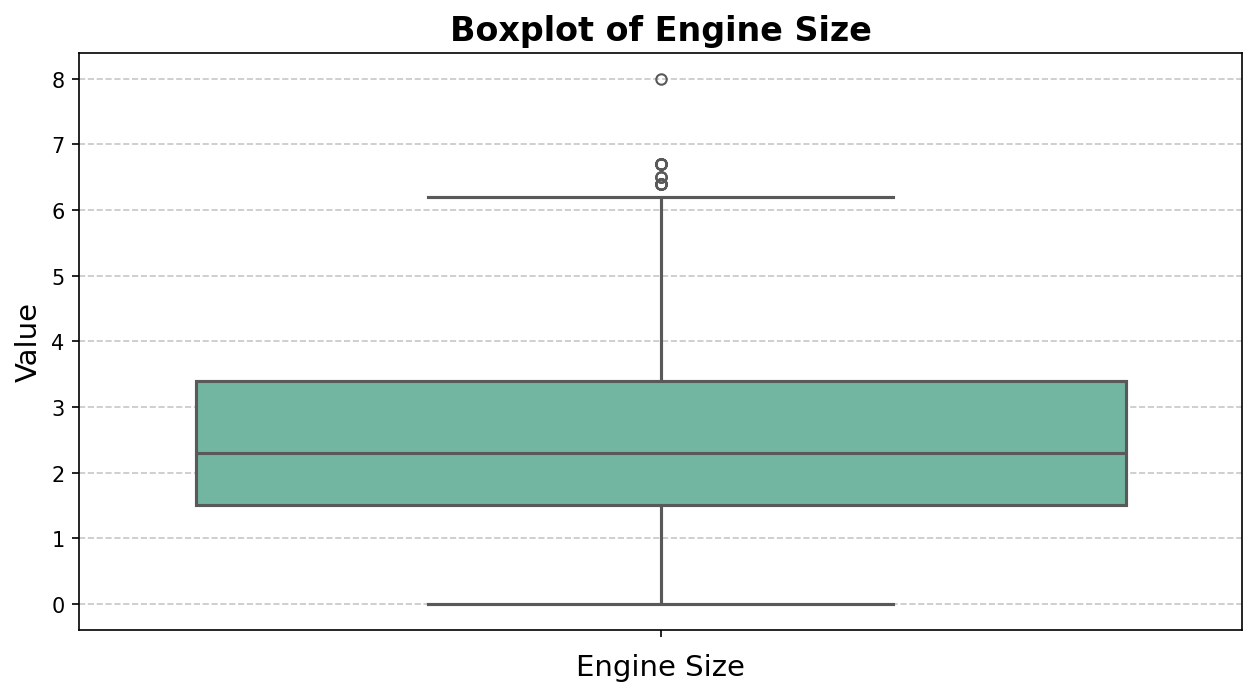

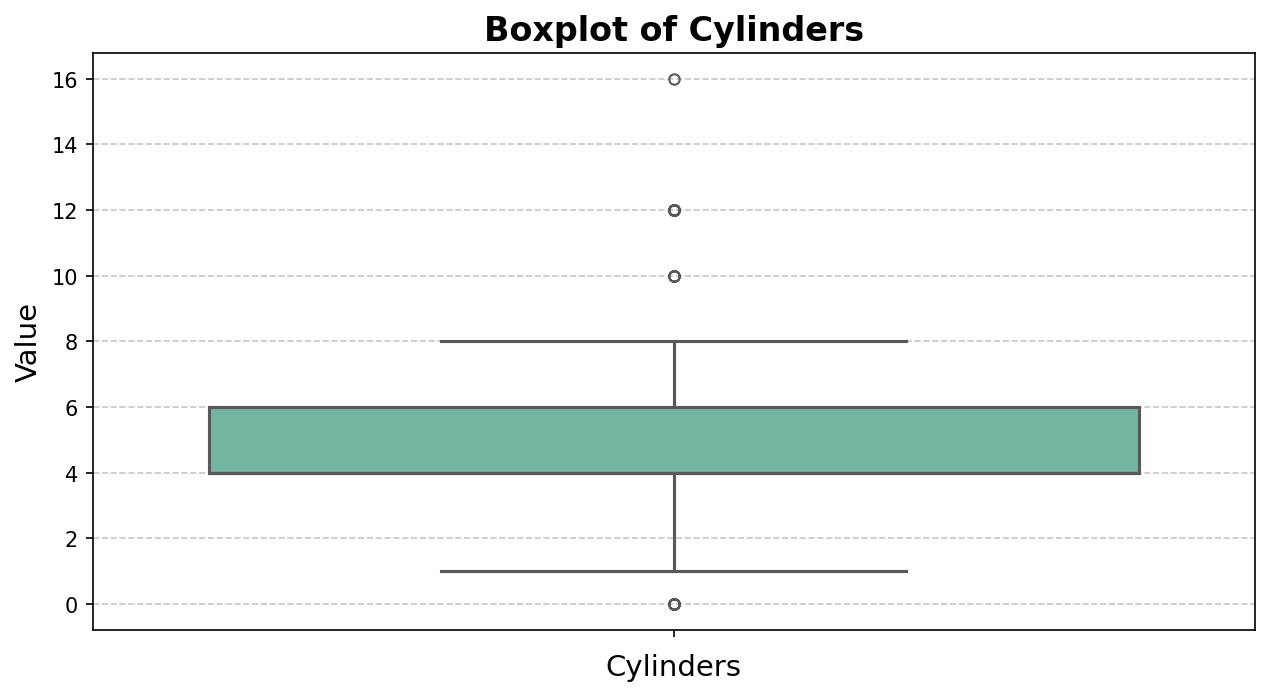

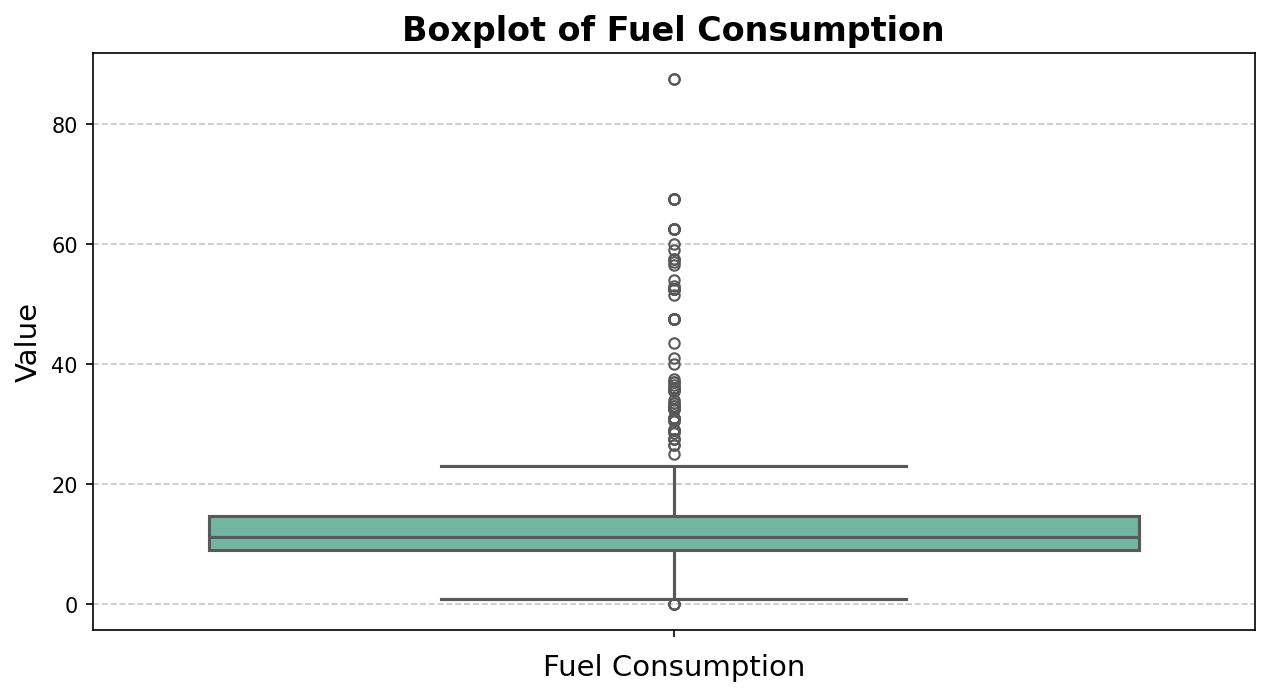

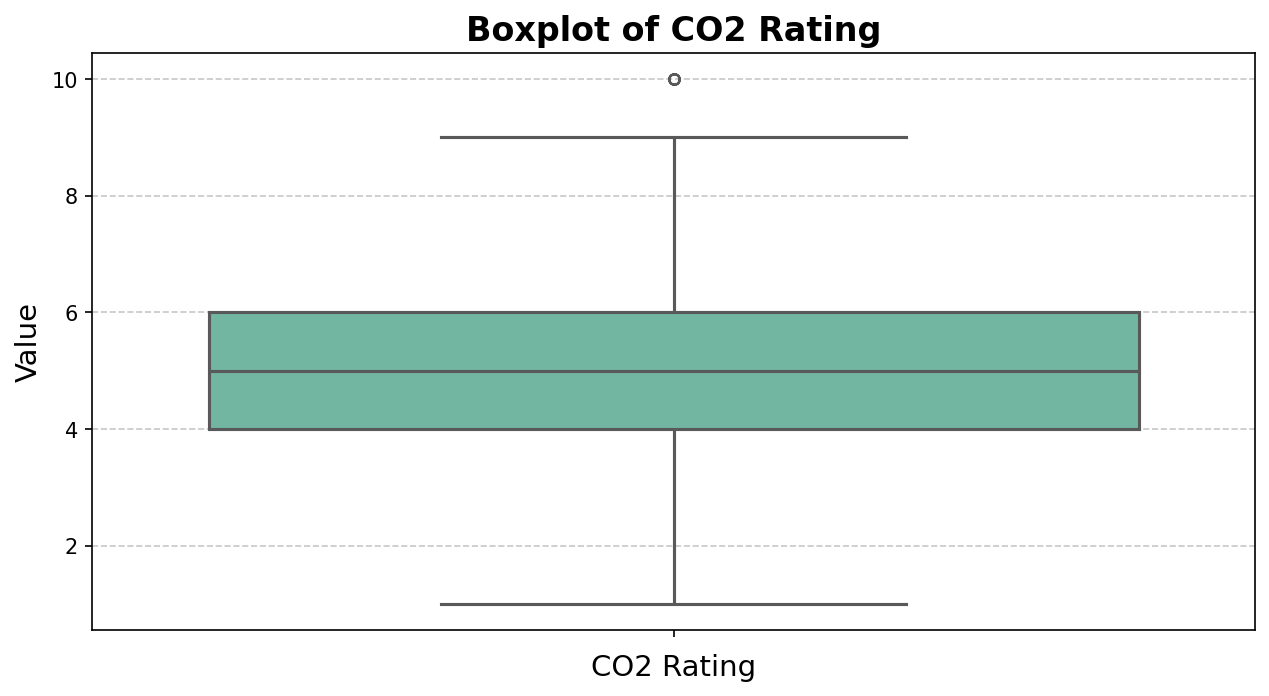

In [39]:
for col in df.columns:
    if df[col].dtypes != object:
        plt.figure(figsize=(10, 5), dpi=150)
        sns.boxplot(y=col, data=df, palette='Set2', linewidth=1.5, fliersize=5)
        plt.title(f'Boxplot of {col}', fontsize=16, weight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

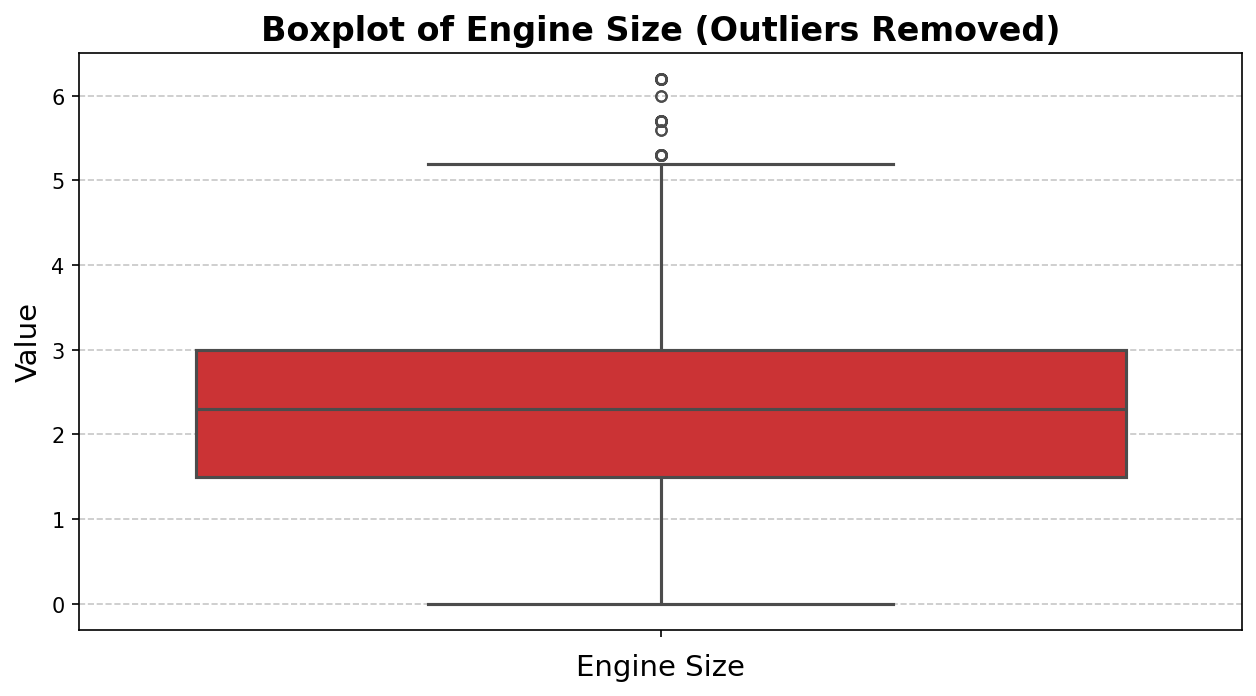

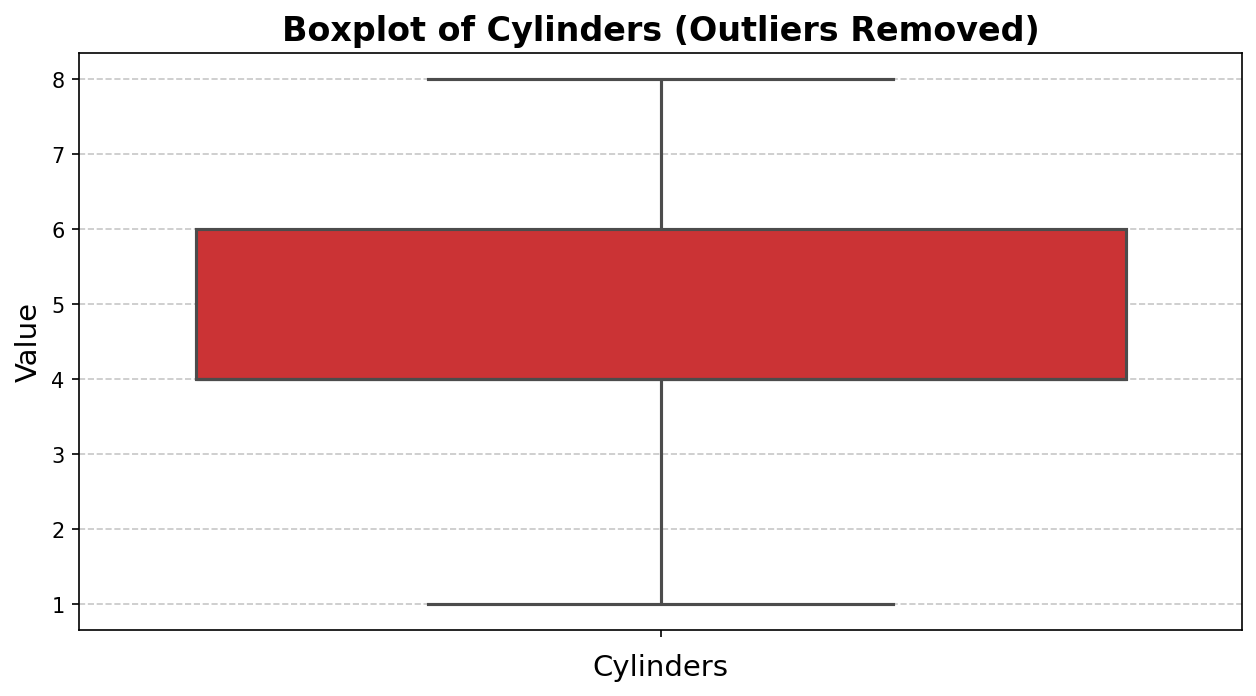

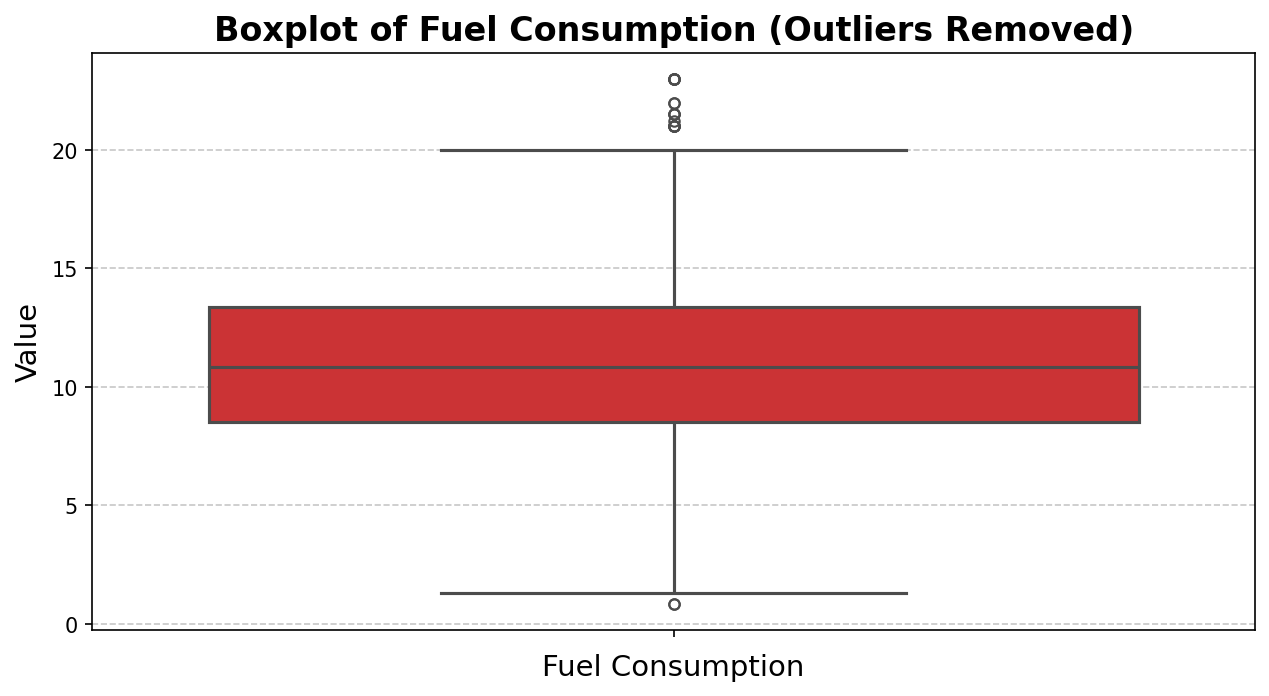

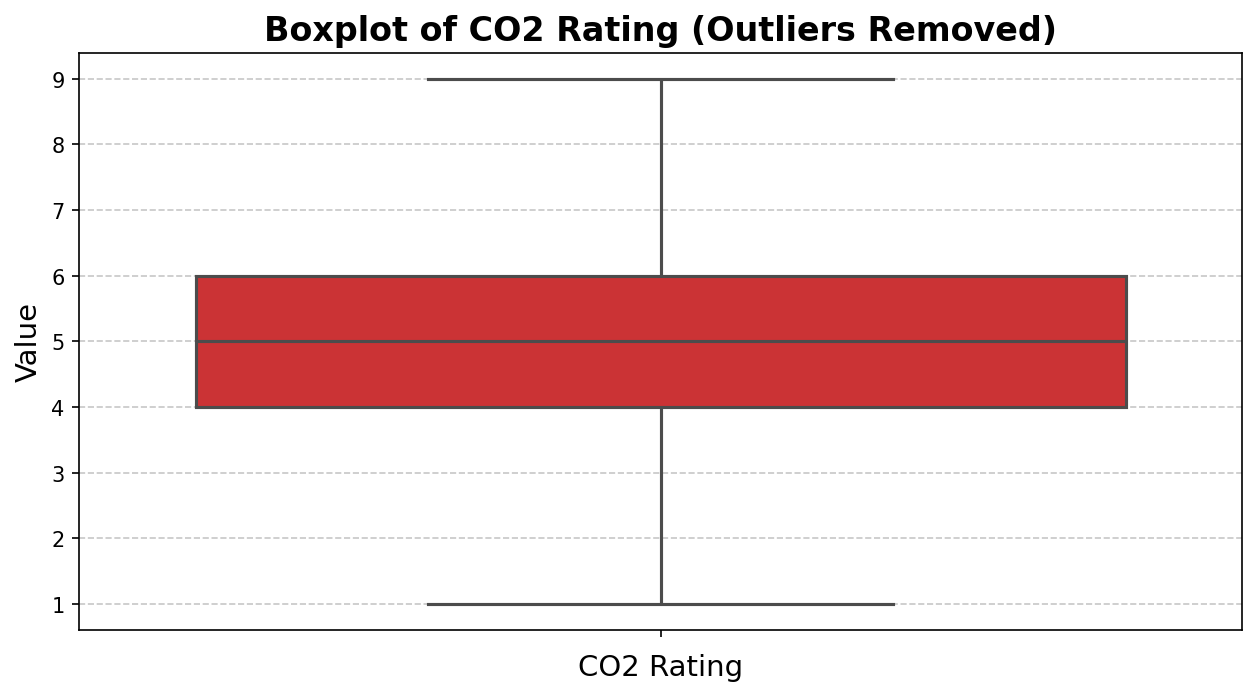

In [40]:
for col in df.columns:
    if df[col].dtypes != object:
        percentile_25 = df[col].quantile(0.25)
        percentile_75 = df[col].quantile(0.75)
        IQR = percentile_75 - percentile_25
        upper_limit = percentile_75 + (1.5 * IQR)
        lower_limit = percentile_25 - (1.5 * IQR)
        df_filtered = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]
        
        plt.figure(figsize=(10, 5), dpi=150)
        sns.boxplot(y=col, data=df_filtered, palette='Set1', linewidth=1.5, fliersize=5)
        plt.title(f'Boxplot of {col} (Outliers Removed)', fontsize=16, weight='bold')
        plt.xlabel(col, fontsize=14)
        plt.ylabel('Value', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [60]:
df.shape

(945, 7)

## 5.3 ORDINAL ENCODING
<span id="ordinal"></span>


In [62]:
from sklearn.preprocessing import OrdinalEncoder

order = ['AV', 'AM', 'M', 'AS', 'A', 'Automatic', 'CVT', 'Manual']  # Include all possible categories
od = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=-1)

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])


In [64]:
from sklearn.preprocessing import OrdinalEncoder

order = ['Two-seater', 'Minicompact', 'Compact', 'Subcompact', 'Mid-size', 
         'Full-size', 'SUV: Small', 'SUV: Standard', 'Minivan',
         'Station wagon: Small', 'Station wagon: Mid-size', 
         'Pickup truck: Small', 'Special purpose vehicle', 
         'Pickup truck: Standard', 'Sedan', 'MPV', 'Hatchback', 
         'Auto Rickshaw', 'Motorcycle', 'Electric SUV', 
         'Electric Scooter', 'Crossover', 'Bike', 'SUV', 
         'Compact SUV', 'Mini Truck', 'Electric Auto', 
         'Electric Vehicle', 'Sports Car', 'Truck', 'Scooter', 
         'Pickup']  

od = OrdinalEncoder(categories=[order], handle_unknown='use_encoded_value', unknown_value=-1)

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])


In [65]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Hatchback,1.2,4,Manual,X,5.2,7.0,7.0,16.0
1,SUV,1.5,4,Automatic,X,6.6,6.0,5.0,23.0
2,Compact SUV,1.5,4,Manual,D,5.5,6.0,7.0,24.0
3,SUV,2.0,4,Manual,X,8.9,5.0,7.0,23.0
4,SUV,1.5,4,Automatic,X,6.4,6.0,5.0,23.0


## 5.4 ONE HOT ENCODING ON CATEGORICAL COLUMNS
<span id="onehot"></span>


In [66]:
new_df = df['Fuel Type'].str.get_dummies()

In [67]:
new_df

,D,Diesel,E,Electric,Petrol,X,Z
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
940,0,0,0,0,0,0,1
941,0,0,0,0,0,0,1
942,0,0,0,0,0,0,1
943,0,0,0,0,0,0,1


In [68]:
df= pd.concat([df,new_df], axis =1)

In [69]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,Diesel,E,Electric,Petrol,X,Z
0,Hatchback,1.2,4,Manual,X,5.2,7.0,7.0,16.0,0,0,0,0,0,1,0
1,SUV,1.5,4,Automatic,X,6.6,6.0,5.0,23.0,0,0,0,0,0,1,0
2,Compact SUV,1.5,4,Manual,D,5.5,6.0,7.0,24.0,1,0,0,0,0,0,0
3,SUV,2.0,4,Manual,X,8.9,5.0,7.0,23.0,0,0,0,0,0,1,0
4,SUV,1.5,4,Automatic,X,6.4,6.0,5.0,23.0,0,0,0,0,0,1,0


## 5.5 SPLIT INTO TRAIN AND TEST SETS
<span id="traintest"></span>


In [70]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [71]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,Diesel,E,Electric,Petrol,X,Z
0,1.2,4,7.0,7.0,16.0,0,0,0,0,0,1,0
1,1.5,4,6.0,5.0,23.0,0,0,0,0,0,1,0
2,1.5,4,6.0,7.0,24.0,1,0,0,0,0,0,0
3,2.0,4,5.0,7.0,23.0,0,0,0,0,0,1,0
4,1.5,4,6.0,5.0,23.0,0,0,0,0,0,1,0


In [72]:
y= df['Fuel Consumption']

In [73]:
y.head().to_frame()

,Fuel Consumption
0,5.2
1,6.6
2,5.5
3,8.9
4,6.4


In [74]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 51)

In [75]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,Diesel,E,Electric,Petrol,X,Z
888,2.400,4,5.0,2.0,1.0,0,0,0,0,0,0,1
560,5.200,10,2.0,1.0,0.0,0,0,0,0,0,0,1
887,2.400,4,5.0,3.0,1.0,0,0,0,0,0,0,1
719,2.000,4,6.0,0.0,6.0,0,0,0,0,0,1,0
366,3.300,6,4.0,3.0,2.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
528,3.600,6,4.0,2.0,6.0,0,0,0,0,0,1,0
709,2.000,4,5.0,3.0,4.0,0,0,0,0,0,0,1
736,1.500,3,7.0,0.0,6.0,0,0,0,0,0,1,0
485,2.000,4,5.0,0.0,6.0,0,0,0,0,0,0,1


## 5.6 FEATURE SCALING TECHNIQUES
<span id="scailing"></span>


In [76]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [77]:
xtrain = sc.fit_transform(xtrain)

In [78]:
xtrain

array([[-0.02593487, -0.24972292, -0.15957616, ..., -0.17908091,
        -1.1330803 ,  1.53994434],
       [ 1.82699634,  2.55668704, -1.93412991, ..., -0.17908091,
        -1.1330803 ,  1.53994434],
       [-0.02593487, -0.24972292, -0.15957616, ..., -0.17908091,
        -1.1330803 ,  1.53994434],
       ...,
       [-0.6215199 , -0.71745791,  1.02345967, ..., -0.17908091,
         0.88254998, -0.64937412],
       [-0.29063933, -0.24972292, -0.15957616, ..., -0.17908091,
        -1.1330803 ,  1.53994434],
       [-1.53805909, -1.6529279 ,  2.79801343, ..., -0.17908091,
        -1.1330803 , -0.64937412]])

In [80]:
xtest = sc.transform(xtest)

In [81]:
xtest

array([[-0.36133364, -1.36236294, -4.26123825, ..., -1.21115088,
        -3.41695127, -2.07106087],
       [-1.80649544, -2.23746704, -3.21155791, ..., -1.21115088,
        -3.41695127,  2.72205445],
       [-1.80649544, -2.23746704, -2.51177101, ..., -1.21115088,
        -3.41695127,  2.72205445],
       ...,
       [-1.49994596, -1.79991499, -3.9113448 , ..., -1.21115088,
         0.64581417, -2.07106087],
       [-1.80649544, -2.23746704, -3.21155791, ..., -1.21115088,
        -3.41695127,  2.72205445],
       [-1.80649544, -2.23746704, -3.21155791, ..., -1.21115088,
         0.64581417, -2.07106087]])

-----
<center>
<h1 style="font-size: 40px; font-family: MS-GOTHIC UI;">6. Training Models</h1>
</center>
<span id="model"></span>

---

# 6.1 LINEAR REGRESSION
<span id="linear"></span>


In [82]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [83]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [84]:
lr.intercept_

np.float64(14.12436440677966)

**EVALUATING MODEL OVERFITTING AND UNDERFITTING**

In [85]:
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  0.5045950415405531
testing score =  -24.894048757892133


In [86]:
ypred = lr.predict(xtest)

In [87]:
r2_score(ytest, ypred)

-24.894048757892133

# 6.2 DECISION TREE REGRESSOR
<span id="decision"></span>


In [88]:
# from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=4)

In [89]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [90]:
ypred=dc.predict(xtest)

**ASSESSING MODEL OVERFITTING AND UNDERFITTING**

In [91]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9181866009137616
testing score =  -12.108596855450237


In [92]:
r2_score(ytest, ypred)

-12.108596855450237

**VISUALISING THE TREE**

In [93]:
from sklearn import tree

In [94]:
new = df[["Vehicle Class","Engine Size","Cylinders","Transmission","Fuel Type","CO2 Rating"]]

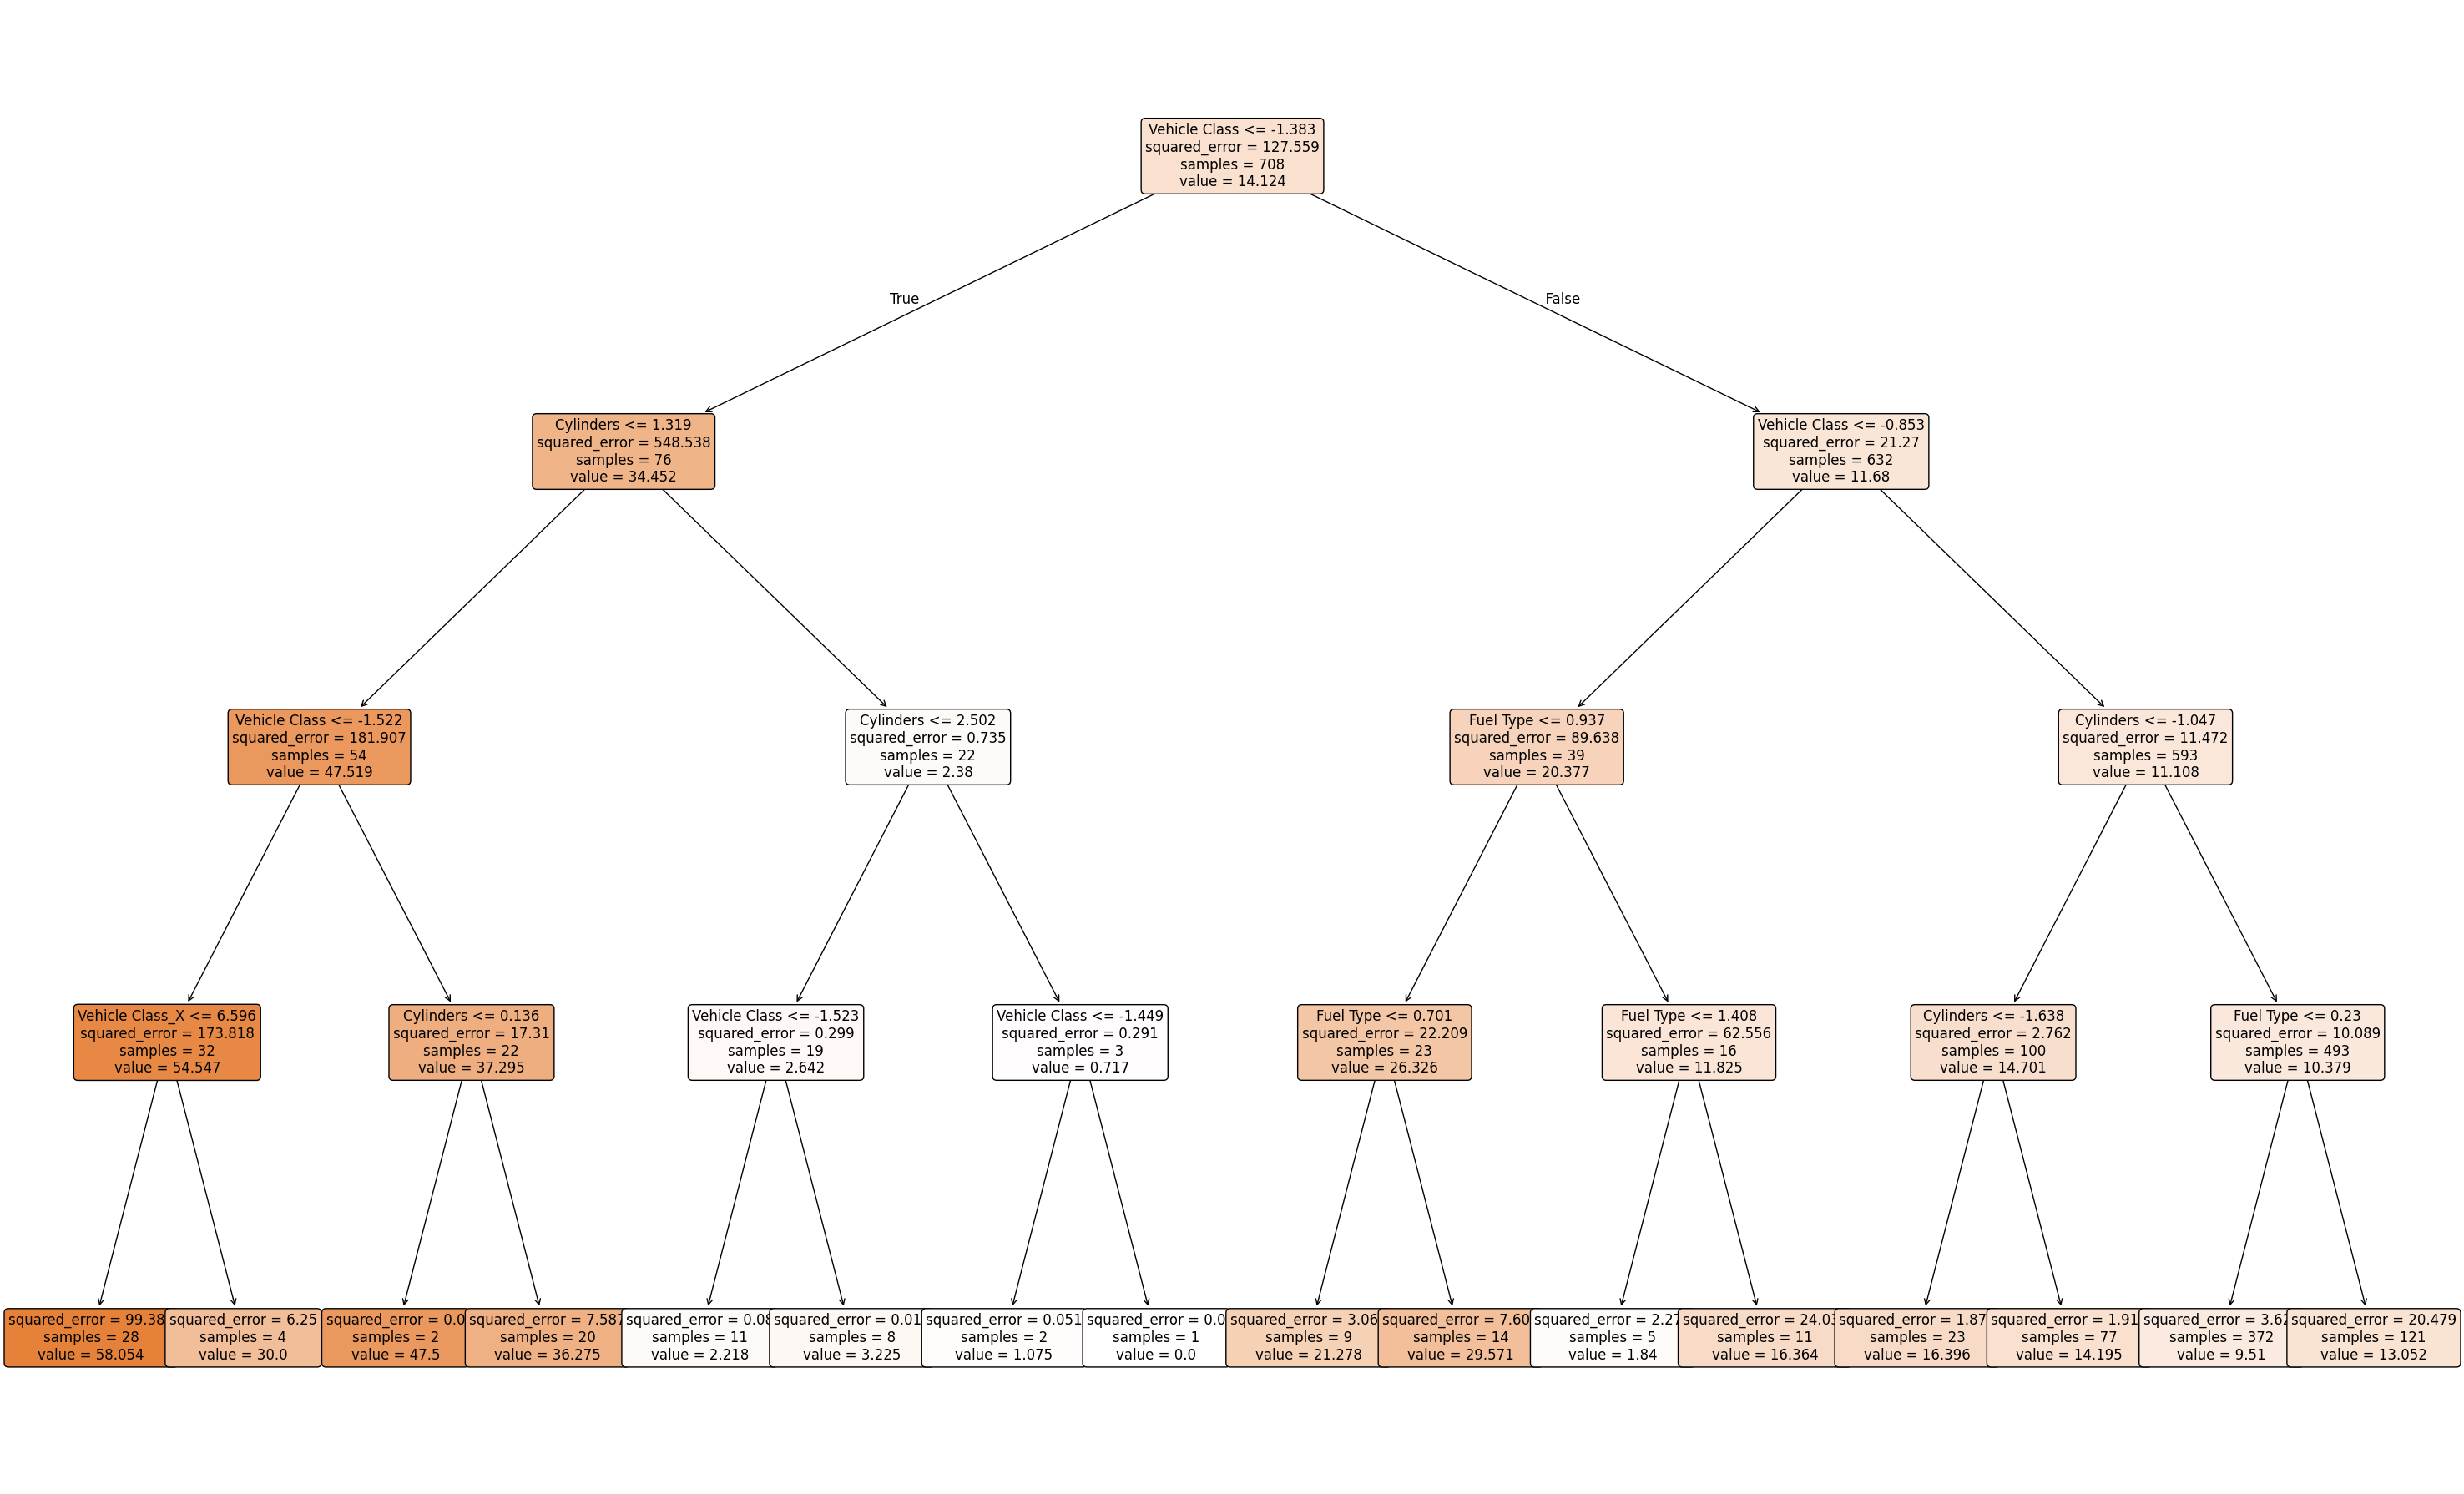

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

plt.figure(figsize=(30, 18))  
plt.title("Decision Tree Visualization", fontsize=30, weight='bold', color='darkblue') 

tree.plot_tree(dc, 
               filled=True,
               rounded=True,
               fontsize=12,  
               feature_names=df.columns,
               class_names=['Class 0', 'Class 1'],
               impurity=True,
               node_ids=False) 

plt.set_cmap('coolwarm')  
plt.tight_layout()  
plt.grid(False)  
plt.show()

# 6.3 RANDOM FOREST REGRESSOR
<span id="rf"></span>

In [102]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [103]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [104]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### HYPER PARAMETER TUNING

In [107]:
from sklearn.model_selection import RandomizedSearchCV

rscv = RandomizedSearchCV(estimator=rf,
                          param_distributions=random_grid,
                          n_iter=25,
                          cv=5,
                          n_jobs=-1,
                          verbose=2,
                          random_state=42)

rscv.fit(xtrain, ytrain)

print("Best Parameters:", rscv.best_params_)
print("Best Score:", rscv.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'n_estimators': 40, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'squared_error'}
Best Score: 0.9527071030912504


In [108]:
rscv.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'squared_error'}

In [109]:
rf = RandomForestRegressor(n_estimators = 60 , min_samples_split = 4, max_features =  'sqrt', max_depth = 10, criterion='squared_error')

In [110]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**ASSESSING WHETHER THE MODEL IS OVERFITTED OR UNDERFITTED**

In [111]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9775692939861195
testing score =  -1.8332707958086316


In [112]:
r2_score(ytest,ypred)

-1.8332707958086316

-----
<center>
<h1 style="font-size: 40px; font-family: MS-GOTHIC UI;">7. DEPLOYMENT OF MODEL</h1>
</center>
<span id="deployment"></span>

---

# 7.1 SERIALIZING THE MODEL AND SCALER OBJECT FOR DEPLOYMENT
<span id="pickling"></span>


In [113]:
import os
import pickle as pk

In [116]:
filename = "scaled_data.sav"
pk.dump(sc, open(filename, "wb"))
loaded_scaler = pk.load(open("scaled_data.sav", "rb")) 

In [118]:
filename = "trained_model_lr.sav"
pk.dump(lr, open(filename, "wb"))
loaded_model = pk.load(open("trained_model_lr.sav", "rb"))

In [119]:
trail_inputs = ["Compact",2.4,4,"AV",6.0,"X"]   

In [125]:
def input_converter(trail_inputs):
    vcl = ['Two-seater', 'Minicompact', 'Compact', 'Subcompact', 'Mid-size', 'Full-size', 
           'SUV: Small', 'SUV: Standard', 'Minivan', 'Station wagon: Small', 
           'Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle', 
           'Pickup truck: Standard']
           
    trans = ['AV', 'AM', 'M', 'AS', 'A']
    fuel = ["D", "E", "X", "Z"]
    
    lst = []

    for i in range(12):
        if i < len(trail_inputs):
            if isinstance(trail_inputs[i], str):
                if trail_inputs[i] in vcl:
                    lst.append(vcl.index(trail_inputs[i]))
                elif trail_inputs[i] in trans:
                    lst.append(trans.index(trail_inputs[i]))
                elif trail_inputs[i] in fuel:
                    fuel_index = fuel.index(trail_inputs[i])
                    lst.append(1 if fuel_index >= 0 else 0)
                else:
                    lst.append(0)
            else:
                lst.append(trail_inputs[i])
        else:
            lst.append(0)

    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)

    print(f"Feature array: {arr}")
    print(f"Expected features: {loaded_scaler.n_features_in_}")
    
    if arr.shape[1] != loaded_scaler.n_features_in_:
        raise ValueError(f"Expected {loaded_scaler.n_features_in_} features, but got {arr.shape[1]} features.")
    
    arr = loaded_scaler.transform(arr)
    prediction = loaded_model.predict(arr)
    
    return f"The Fuel Consumption L/100km is {round(prediction[0], 2)}"

input_converter(trail_inputs)

Feature array: [[2.  2.4 4.  0.  6.  1.  0.  0.  0.  0.  0.  0. ]]
Expected features: 12


'The Fuel Consumption L/100km is 15.29'

-------
-------
-------
<center>
    <h1 style="font-size: 30px; font-family: 'MS Gothic', sans-serif; color: #FFFFFF; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        HENCEFORTH, THE ANALYSIS OF FUEL CONSUMPTION PER KILOMETER HAS BEEN COMPLETED.
    </h1>
</center>


<center>
    <img src="https://media1.tenor.com/m/Ckb7Xt5usBIAAAAd/kanye-west-dance.gif" width="550" height="100">
</center>